#### Importing Libaries and packages  need

In [24]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px


#### Reading the files( 'doctors.csv ','hospital_visits.csv','patients.csv')

In [25]:

# import module
import pandas as pd

# assign dataset names
list_of_names = ['doctors','hospital_visits','patients']
  
# create empty list
dataframes_list = []
  
# append datasets into teh list
for i in range(len(list_of_names)):
    temp_df = pd.read_csv("./"+list_of_names[i]+".csv")
    dataframes_list.append(temp_df)

doctor_df = dataframes_list[0]
hospital_visits_df = dataframes_list[1]
patients_df = dataframes_list[2]

##### Merging the files

In [26]:
# merging  patients.csv and hospital_visits
merged_df =patients_df.merge(hospital_visits_df, left_on="id", right_on='patient_id')
# adding doctors.csv to the mix
final_df = merged_df.merge(doctor_df, left_on="doctor_id", right_on='id')
final_df.head(5)


,id_x,name_x,created_at_x,sex,id_y,patient_id,doctor_id,created_at_y,type,id,name_y,created_at
0,8zlBdIYb3JINAF8JsJPpOg==,GTcUo1tETRlRsHyyZP+av9h6YQGY6IWzc4693Dk+OEE=,2020-03-08,male,vGGugcf8Sxjje0ke3rQyEw==,8zlBdIYb3JINAF8JsJPpOg==,SdYno7IhBPsZxFawi3VT9g==,2021-06-24,out-patient,SdYno7IhBPsZxFawi3VT9g==,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,2021-01-03
1,mIkieJ8/hFBn8WhL7obM7A==,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,2018-10-04,male,VDbW5RQnLvgpIYucwgkOog==,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-06-28,out-patient,SdYno7IhBPsZxFawi3VT9g==,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,2021-01-03
2,mIkieJ8/hFBn8WhL7obM7A==,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,2018-10-04,male,HuFXRWg3IIYuo+ukPfYDdg==,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-07-23,out-patient,SdYno7IhBPsZxFawi3VT9g==,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,2021-01-03
3,mIkieJ8/hFBn8WhL7obM7A==,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,2018-10-04,male,zwQMUlFKe5fR8MDRNIo/BQ==,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-07-24,out-patient,SdYno7IhBPsZxFawi3VT9g==,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,2021-01-03
4,JSXrHQsVDhig9bSnGhjiCg==,sBg1WcRRfMVX/Fn5gSQvQMWXAsXHYR8XJBzGOH5he5I=,2018-07-05,male,ZBCUl3ShAWowAQwhAkaa6A==,JSXrHQsVDhig9bSnGhjiCg==,SdYno7IhBPsZxFawi3VT9g==,2021-06-24,out-patient,SdYno7IhBPsZxFawi3VT9g==,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,2021-01-03


#### Cleaning the dataframe
##### dropping rendundant columns and renaming columns appropriately

drop id_x and id_y created at x,id,created_at
rename name to patient name 
rename created_at_y to date of visit
rename name_y to Doctors_name

In [27]:
#dropping clumns
final_df.drop(['id_x', 'id_y','created_at_x','id', 'created_at'], axis = 1 ,inplace=True)
final_df.head()


#Renaming columns
final_df.rename(columns = {'name_x': 'Patient_Name','created_at_y':'date_of_visit','name_y':'Doctors_name' }, inplace = True)
final_df.head(10)

,Patient_Name,sex,patient_id,doctor_id,date_of_visit,type,Doctors_name
0,GTcUo1tETRlRsHyyZP+av9h6YQGY6IWzc4693Dk+OEE=,male,8zlBdIYb3JINAF8JsJPpOg==,SdYno7IhBPsZxFawi3VT9g==,2021-06-24,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=
1,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,male,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-06-28,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=
2,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,male,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-07-23,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=
3,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,male,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-07-24,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=
4,sBg1WcRRfMVX/Fn5gSQvQMWXAsXHYR8XJBzGOH5he5I=,male,JSXrHQsVDhig9bSnGhjiCg==,SdYno7IhBPsZxFawi3VT9g==,2021-06-24,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=
5,WOT8SypkGrG3diUySsRkALqLMBElbjv9ukGpeyYGKm0=,male,5Lq6of1mUksbAbOwXzUoEg==,SdYno7IhBPsZxFawi3VT9g==,2021-06-12,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=
6,9Cqo7DlBAVddElVxybe5Qea7VX9N9vWs+EwCaWnQXa8=,male,JBImqBVGoVBuKpSeoaqlLw==,SdYno7IhBPsZxFawi3VT9g==,2021-05-12,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=
7,oZ7uFc8dnMBpK4nxCCVDE6vArp+ZhQtZsCMIdnNXks4=,male,Q45oywTW2s7E8J5W1arnDw==,SdYno7IhBPsZxFawi3VT9g==,2021-06-03,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=
8,dFQX4SEs3peoA4YJac3xrgE0TAQkSPusFvUhA7OmS7o=,male,NwmL+egj3X/vzjg0CBqoig==,SdYno7IhBPsZxFawi3VT9g==,2021-07-09,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=
9,CMah9d/i9Z+YqHKLOUuBCBgDMu237f7RuCfC3kHpgM4=,male,sbbhl7zz5hwgQF3bs6ObOw==,SdYno7IhBPsZxFawi3VT9g==,2021-05-03,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=


#### Checking the shape of the data


In [28]:
final_df.shape

(1611, 7)

##### Expot final dataset

#### Checking for Missind data

<AxesSubplot:>

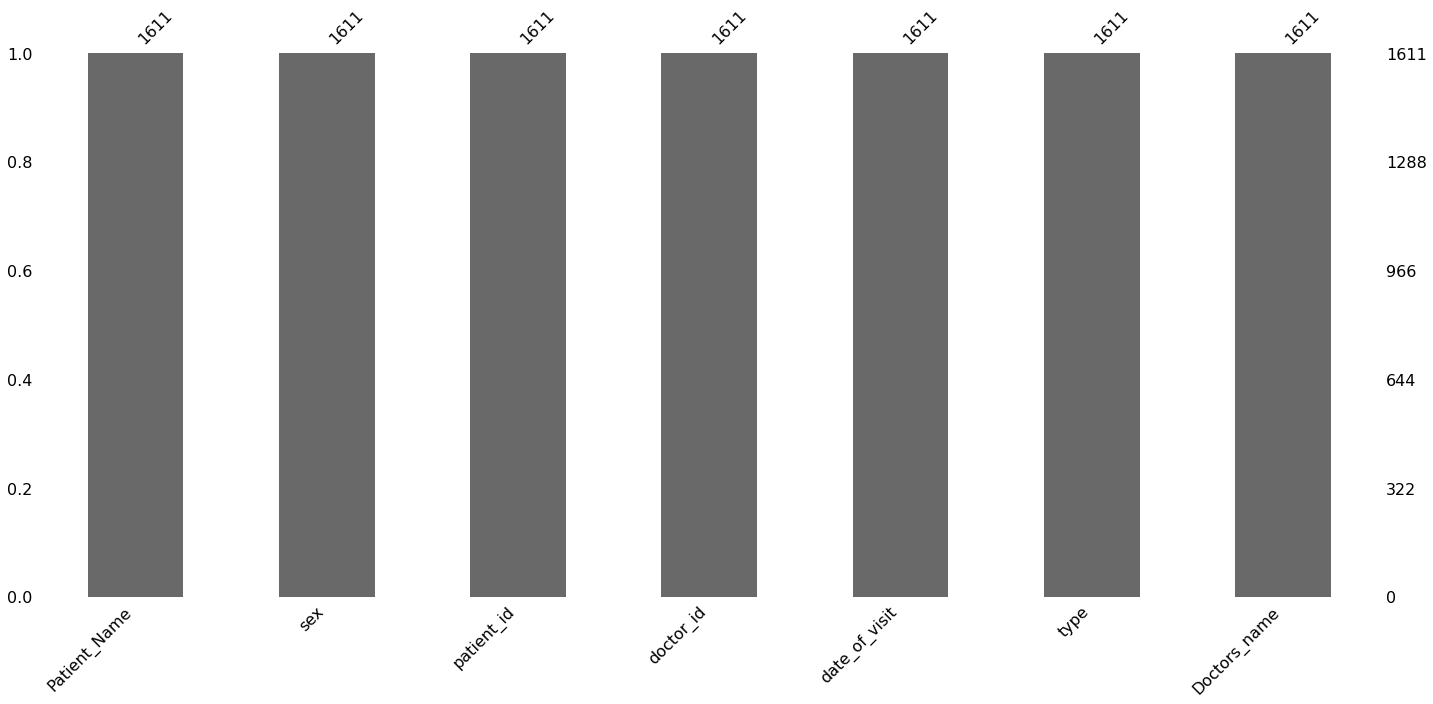

In [29]:
msno.bar(final_df)

# Mo missing data in the dataframw

#### Checking the datatypes of the dataframe

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 0 to 1610
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Patient_Name   1611 non-null   object
 1   sex            1611 non-null   object
 2   patient_id     1611 non-null   object
 3   doctor_id      1611 non-null   object
 4   date_of_visit  1611 non-null   object
 5   type           1611 non-null   object
 6   Doctors_name   1611 non-null   object
dtypes: object(7)
memory usage: 100.7+ KB


###    Answer 1: Number of hospital visits per day over the period

##### Adding a count column

In [31]:
final_df['count'] = 1

final_df.head()

,Patient_Name,sex,patient_id,doctor_id,date_of_visit,type,Doctors_name,count
0,GTcUo1tETRlRsHyyZP+av9h6YQGY6IWzc4693Dk+OEE=,male,8zlBdIYb3JINAF8JsJPpOg==,SdYno7IhBPsZxFawi3VT9g==,2021-06-24,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1
1,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,male,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-06-28,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1
2,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,male,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-07-23,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1
3,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,male,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-07-24,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1
4,sBg1WcRRfMVX/Fn5gSQvQMWXAsXHYR8XJBzGOH5he5I=,male,JSXrHQsVDhig9bSnGhjiCg==,SdYno7IhBPsZxFawi3VT9g==,2021-06-24,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1


##### Changing the date_of_visit to Date Type

In [32]:
final_df[["date_of_visit"]].apply(pd.to_datetime)

final_df.head()

,Patient_Name,sex,patient_id,doctor_id,date_of_visit,type,Doctors_name,count
0,GTcUo1tETRlRsHyyZP+av9h6YQGY6IWzc4693Dk+OEE=,male,8zlBdIYb3JINAF8JsJPpOg==,SdYno7IhBPsZxFawi3VT9g==,2021-06-24,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1
1,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,male,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-06-28,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1
2,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,male,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-07-23,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1
3,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,male,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-07-24,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1
4,sBg1WcRRfMVX/Fn5gSQvQMWXAsXHYR8XJBzGOH5he5I=,male,JSXrHQsVDhig9bSnGhjiCg==,SdYno7IhBPsZxFawi3VT9g==,2021-06-24,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1


In [33]:
visits_per_day = final_df.groupby(final_df['date_of_visit']).sum().reset_index()

##### Visualizing the Output in Area Chart

In [34]:


fig = px.area(visits_per_day, x='date_of_visit', y="count", title="Plot of Patient Vists vs Date of Visits (Area Chart)")
fig.show()

##### Visualizing the Output in Bar Chart

In [35]:
fig = px.bar(visits_per_day, x='date_of_visit', y="count" ,title="Plot of Patient Visits vs Date of Visits (Bar Chart)")
fig.show()

###  Answer 2: Number of patients attended to per doctor per month showing their names

##### Creating the Month-Year Column

In [36]:

final_df['Month_Year'] = pd.to_datetime(final_df['date_of_visit']).dt.month_name().map(str) + " "+  pd.to_datetime(final_df['date_of_visit']).dt.year.map(str)

final_df.to_clipboard()


##### Dropping Duplicate clients to get Unique clients per Month

In [37]:
patient_df = final_df[final_df.duplicated(subset=[ 'patient_id','Month_Year'])].drop_duplicates(keep='first')   
# patient_df = final_df.drop_duplicates(subset=['patient_id'], keep='first')
patient_df.shape


(837, 9)

In [38]:
patient_df

,Patient_Name,sex,patient_id,doctor_id,date_of_visit,type,Doctors_name,count,Month_Year
3,XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=,male,mIkieJ8/hFBn8WhL7obM7A==,SdYno7IhBPsZxFawi3VT9g==,2021-07-24,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1,July 2021
11,sAgUtYoEcFqYZCure5kAaMXKLZbT6lo/mT1DXd70Q6M=,male,mNxrJP5zMwQPeROrCkYIpA==,SdYno7IhBPsZxFawi3VT9g==,2021-05-13,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1,May 2021
12,sAgUtYoEcFqYZCure5kAaMXKLZbT6lo/mT1DXd70Q6M=,male,mNxrJP5zMwQPeROrCkYIpA==,SdYno7IhBPsZxFawi3VT9g==,2021-05-16,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1,May 2021
14,sAgUtYoEcFqYZCure5kAaMXKLZbT6lo/mT1DXd70Q6M=,male,mNxrJP5zMwQPeROrCkYIpA==,SdYno7IhBPsZxFawi3VT9g==,2021-06-23,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1,June 2021
17,T24s2IPX1yFVoT19u944/OhjmyOXxK9Bx3iErOIo3LM=,male,V7TZHOZ+xRdjBeA2EkzRSw==,SdYno7IhBPsZxFawi3VT9g==,2021-07-16,out-patient,WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=,1,July 2021
...,...,...,...,...,...,...,...,...,...
1606,y1BBWWuDXC8v5B5rr2kSvf9kunlS6ZyFzBRIhXP9kbI=,female,e67Sh4UJHMew+ztSvl7i1g==,4/de+E7w0FRjaRuXcf1Zag==,2021-07-22,out-patient,QTdef3Okr1/FcXUMYAbUgMO9bafMgbWrQnNuF0z2h5U=,1,July 2021
1607,83xy5lZEOhVMW9euw/7N+Kfv5DmemCcpbSSGb8B3xWE=,female,OfWaf4IxQ1F+0r0riCWZGQ==,4/de+E7w0FRjaRuXcf1Zag==,2021-07-26,out-patient,QTdef3Okr1/FcXUMYAbUgMO9bafMgbWrQnNuF0z2h5U=,1,July 2021
1608,cOn1XZ4Kfv9pWWghvZrpWL98WfVgqlFORxDMhM4Ph/c=,male,lkrYHiSDmJxjdrmCn+E5cQ==,4/de+E7w0FRjaRuXcf1Zag==,2021-07-22,out-patient,QTdef3Okr1/FcXUMYAbUgMO9bafMgbWrQnNuF0z2h5U=,1,July 2021
1609,F+eP4TVjfrwY4iwyzDvjlbrNC2sjpMEkxtd7xyayndI=,female,dy1Quog5pLYfpxTzXO4eXw==,4/de+E7w0FRjaRuXcf1Zag==,2021-07-22,out-patient,QTdef3Okr1/FcXUMYAbUgMO9bafMgbWrQnNuF0z2h5U=,1,July 2021


In [39]:

patient_df["grouped"]= patient_df.groupby(["doctor_id","Month_Year"])["Patient_Name"].transform(lambda x: ','.join(x))
patient_df.head(10)

Patient_Name   sex  \
3   XHB0+FAjJtcape6I90URgLIO5A4ipN8zjkeBpmJLc9s=  male   
11  sAgUtYoEcFqYZCure5kAaMXKLZbT6lo/mT1DXd70Q6M=  male   
12  sAgUtYoEcFqYZCure5kAaMXKLZbT6lo/mT1DXd70Q6M=  male   
14  sAgUtYoEcFqYZCure5kAaMXKLZbT6lo/mT1DXd70Q6M=  male   
17  T24s2IPX1yFVoT19u944/OhjmyOXxK9Bx3iErOIo3LM=  male   
25  +wBKI48Sb9UBnCAP5e9jfd4DL2Hie2cJz9GvsiylvyQ=  male   
29  MPOvxX2y4Jc8/bd5d83KdtQEdeWPwIInVUHIColCyhk=  male   
32  JvkK05gF0vhlJhjMCS77uORDXBkJ82kArIiUNFbBVSk=  male   
40  EAYNXzUJ7wqQxhWfsV9x7bz0mbyXBsbc73JwBAf2KCk=  male   
42  tQ/rDqu8bDyAJf/PnxQZnVu3/F+1zht1IUWuBx3I5ss=  male   

                  patient_id                 doctor_id date_of_visit  \
3   mIkieJ8/hFBn8WhL7obM7A==  SdYno7IhBPsZxFawi3VT9g==    2021-07-24   
11  mNxrJP5zMwQPeROrCkYIpA==  SdYno7IhBPsZxFawi3VT9g==    2021-05-13   
12  mNxrJP5zMwQPeROrCkYIpA==  SdYno7IhBPsZxFawi3VT9g==    2021-05-16   
14  mNxrJP5zMwQPeROrCkYIpA==  SdYno7IhBPsZxFawi3VT9g==    2021-06-23   
17  V7TZHOZ+xRdjBeA2EkzRSw==  SdYno7IhBPsZxFawi3VT9g==    2021-07-16   
25  zQCxWb9sDevjUBnrGk4TOg==  SdYno7IhBPsZxFawi3VT9g==    2021-07-19   
29  okjmWBWaGboBivYciYtSHg==  SdYno7IhBPsZxFawi3VT9g==    2021-07-27   
32  KM8hGc8mOsyxRW00Bch6eg==  SdYno7IhBPsZxFawi3VT9g==    2021-05-28   
40  HuLEUY1kFvygErFkAXvCJA==  SdYno7IhBPsZxFawi3VT9g==    2021-06-08   
42  WeN+n21Gba4zENpXPaWBNQ==  SdYno7IhBPsZxFawi3VT9g==    2021-05-10   

           type                                  Doctors_name  count  \
3   out-patient  WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=      1   
11  out-patient  WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=      1   
12  out-patient  WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=      1   
14  out-patient  WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=      1   
17  out-patient  WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=      1   
25  out-patient  WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=      1   
29  out-patient  WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=      1   
32  out-patient  WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=      1   
40  out-patient  WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=      1   
42  out-patient  WDiDokM3moCTG3lVg+lQmMhh+QDhtMlF/jHj3tjrSDw=      1   

   Month_Year  \
3   July 2021   
11   May 2021   
12   May 2021   
14  June 2021   
17  July 2021   
25  July 2021   
29  July 2021   
32   May 2021   
40  June 2021   
42   May 2021   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [40]:

patient_df_group =patient_df.groupby(['doctor_id','Month_Year','grouped']).sum().reset_index()
patient_df_group.head(10)

,doctor_id,Month_Year,grouped,count
0,3TB6T8CT/m/sBtYXy8XpTg==,July 2021,"T24s2IPX1yFVoT19u944/OhjmyOXxK9Bx3iErOIo3LM=,1vbeI+TzP2v2CHMaWSdVpSrbwzihSJv//7eqjZk2nOs=,rEHuUa8V1hBvLFAe4Ri0B3Hl7gSEl3mOE8Uj2SEjotw=,hznxDbjh9jkMCqm7Q3jjPSiWtvtvunxwacmzFc1RDfE=,s2oj6p+Ub7XtmPswDvvRYaHBCHISGmcFK/1L/cowrdk=,pyljnOmnO9PUKw/E1So0DsMkJMQgaYU4hbnENgC5fMs=,GKQINGs2vns7Ocrd9x/FAMAm6jdgzGUNgPFtdjrI8g4=,om6e09W6eGp1+AcaWTEZixVvOWA5EXN4ZSVgZ7sMGlQ=,u+cUNs32hUi8b4NpN5gLQuawitNvtuYTcTFtXB1stZQ=,5CyNu5QdzU2WJCA+hskS9XZQxHZOA+FhIEpjlT9+jtQ=",10
1,3TB6T8CT/m/sBtYXy8XpTg==,June 2021,"WOT8SypkGrG3diUySsRkALqLMBElbjv9ukGpeyYGKm0=,b1u+3zFPp4I9C6RHrtnBrk3cP5w08YeqNZ0AueTONK4=,7HucRn3d6O58aBQqG98kEALvzM0z+8ki51JkBtjxQl4=,OKZacDmLVGxQDoUeS0Qbu/M5ICoGLjCQOoOhdgm7guI=,H11Dk69Jro8rLieOsLCMNQlfzCShp0MaTLaurtmPMsI=,vwNzJDXt6M7gmT5szuaRX+7dwCD5rGuhkNW2d35Xm2s=,pyljnOmnO9PUKw/E1So0DsMkJMQgaYU4hbnENgC5fMs=,e9cTC5eCXW/Zub9qupNrPl/KoBNQvMH2IDUiEBS9cKw=,mB3ehPc/P5rgYswI70L7zN9+sJ8elJKnpxHbqxWon98=,gyf1oTfIrkD5v3GmkPb4EVwImCbXVLURFjaLJliQsd8=,KtqqR5iUMimiTfYiFVtnoQFv296U1Nw2g0ClE94WK2o=,KtqqR5iUMimiTfYiFVtnoQFv296U1Nw2g0ClE94WK2o=,22WGa270+CUzo/ab5cPxD59NY/y9nE3dyeKd5Ds2FsI=,mYbc7wUF1QSwbg2rBEvi4odfOIsA+Hn1MNpT09UfClA=,9Ttabboo+kmtQ5RhcW3yz2hpLqxDKDQj63rD/zRAvcs=,IzNDUbtvXfKGcHIwHwVnhoYB0o52O9GRkV6SYJAMkps=,StVRfVcTAU5RJr0x6Ji1tGnx9aSfNpeSXCj1pCO3Xys=,Eno0xhuOYmq/qf5Lhk61tBKpCJY1LrPHX/BTVxpAG98=,vVRzZ++ukBCOiDZCB+nz/etA2uxNmJUNkTrO3c08JIM=,15GkTTI81cjUmaPihs/RnDtWuppH36urHgzX/7KIK5Y=,26K9iX4Es+Xo9eMgrKTUmJo0kFieRsjtWvv4riA7kXk=,BbYiAijHAj7A2XKDzScHXpOXu/S31kVIdbUG53rYNLE=,jHbdfOdqg5dLhmkx/MChZONfNtqmjbiRjL8uPkPImB0=",23
2,3TB6T8CT/m/sBtYXy8XpTg==,May 2021,"VrM1KAmU93/ptO3fHOzxCSivOjFWZ9mdvVBks8Ro4pw=,OpGSQ51uE3m6afSTQzasAKXBLdLG02AhSOs4RyQS5Sc=,0Bd558J+lSGjMhi7+LvcRo/ogpxJQs5oYExkucW5mc8=,8z4W/B9BON1gK0pkR7FEheBjpH1ztsM2agYAbfQPlAc=,QIYC6I8ZFGkLzRtCpSJYBLY//X9g/juHqX7AnKk+P8Y=,gOO+qYJzDss9vSUX1t4N/oPoP/Jk+7Jj7XXcIOJlgek=,CiORm3vSGQjy0j2lHS/WLzrCPCwI/6I+5xU4fg6tE6k=,+EK1OkhDOgwqTwDrDV0vludQ5Aj2Pkf62UzC4ZQQ3bg=,Rmpw89UzKMnB15feVq3tydelRIfYeIuArd5ojSDRmlA=",9
3,4/de+E7w0FRjaRuXcf1Zag==,July 2021,"ZbK4yv+NmIji9cDj7oqihR9fEMoO9phPFibiwbmvk8U=,bMtLpY4ESZ+GpJrxG4f+Ug0sRdpPRwadzF6SFek4RtY=,ESPecLeQDa1TV3EcEwkM2NxGs18vbzBiYCercHUv9FY=,y1BBWWuDXC8v5B5rr2kSvf9kunlS6ZyFzBRIhXP9kbI=,83xy5lZEOhVMW9euw/7N+Kfv5DmemCcpbSSGb8B3xWE=,cOn1XZ4Kfv9pWWghvZrpWL98WfVgqlFORxDMhM4Ph/c=,F+eP4TVjfrwY4iwyzDvjlbrNC2sjpMEkxtd7xyayndI=",7
4,7HLGJ96/7ZNNHLQao48zbg==,July 2021,"2K59RgmzY2u2Jjq9ktlaSdgxn3my1osYUspxze6dhQE=,qDEWQmcGH2P3TEpEkzLlvniAqhk0VCt80e7ugRoXYxA=,DiYfIPQn1aW3y1c0SKilXBQb0SKiR521IVmNI38vZPM=",3
5,7HLGJ96/7ZNNHLQao48zbg==,June 2021,"EAYNXzUJ7wqQxhWfsV9x7bz0mbyXBsbc73JwBAf2KCk=,5vp0ffvjOCHO0y5c8pj35aO6JBIdFKkVXX7ZI07NnJE=,5vp0ffvjOCHO0y5c8pj35aO6JBIdFKkVXX7ZI07NnJE=,XOQDcIyR5+AbD0exLJH66Cwih8Q0S2g6ptwRqpSuEYY=",4
6,7HLGJ96/7ZNNHLQao48zbg==,May 2021,/NsqHJd0vGw34zi3EMYl0sQHXioThuJId1Ju+RYoq9U=,1
7,9nnTmV6ViwHCyg4C8WEkzg==,July 2021,"+wBKI48Sb9UBnCAP5e9jfd4DL2Hie2cJz9GvsiylvyQ=,tQ/rDqu8bDyAJf/PnxQZnVu3/F+1zht1IUWuBx3I5ss=,ACVG0DzF5imKzX2RchviuIOL6nBrWhhXnHBA5D+lpVw=,0O3Apdzs1bf5CWhWcLaXe1xaQ25GeWuAYWtTAYdMsuY=,JBobAv4PTG4yh+FFtt4p20cVxsY3wBA+rmbT5zqD2QE=,dda4tJ5bT+vVhzBobN6TwLuKIDXviBI6Y1lTPBgV92Y=,mtO4G/dkIzYCBfthsX5RDTG2kIiyFTZYRcPmZA4tQJw=,om6e09W6eGp1+AcaWTEZixVvOWA5EXN4ZSVgZ7sMGlQ=,aIoniH5rEXjP2yFUogVX4ELdjXwAltQhL01sDE4CnvU=",9
8,9nnTmV6ViwHCyg4C8WEkzg==,June 2021,"EAYNXzUJ7wqQxhWfsV9x7bz0mbyXBsbc73JwBAf2KCk=,rEHuUa8V1hBvLFAe4Ri0B3Hl7gSEl3mOE8Uj2SEjotw=,Tj60jjO5aXI7uzRf9DXpf3bN/rb1PUrirVMTKFgodpw=,F+12TZEQOzriVac39rA22tZXF3vXoQkrI7xGfrXhHdg=,lhMB6CFtJybzTg7qUhEl1C33g4UC8ayTcOilvN39cUQ=,kW3GtHnbo9CFidEEbdhlO/b5SHER2yu8gUCiQSTXh44=,3P8atYPEuRqk4y7Nb9MCGW9nP1GpRPvOKaeE3aOq/ZU=,BOID2T30rY0PCqqO4RBkTuUkLeo+V5QxjNjzvzSgvJw=,n2COh6a0d4Wy0rxhZZmkPaHepnNYGmSPD3Qx8u8WMzs=,26K9iX4Es+Xo9eMgrKTUmJo0kFieRsjtWvv4riA7kXk=",10
9,9nnTmV6ViwHCyg4C8WEkzg==,May 2021,"q9467KIsS8F1eYnsg0llV0ZjD+78QH4Hb1WpJmi/2/U=,pteLlWk/C9aIySolrZNPEhg7fnBtcAZMpwDwS6UuOpk=,cuLmSzA0HZSRrRWSeJ7gRU/J1nsVMhxViVuHYrEYwdk=,/OwC

### Show the names of the clients seperated by comma

In [41]:
pd.set_option('display.max_colwidth', None)
patient_df_group[['count', 'grouped']].head(20)


,count,grouped
0,10,"T24s2IPX1yFVoT19u944/OhjmyOXxK9Bx3iErOIo3LM=,1vbeI+TzP2v2CHMaWSdVpSrbwzihSJv//7eqjZk2nOs=,rEHuUa8V1hBvLFAe4Ri0B3Hl7gSEl3mOE8Uj2SEjotw=,hznxDbjh9jkMCqm7Q3jjPSiWtvtvunxwacmzFc1RDfE=,s2oj6p+Ub7XtmPswDvvRYaHBCHISGmcFK/1L/cowrdk=,pyljnOmnO9PUKw/E1So0DsMkJMQgaYU4hbnENgC5fMs=,GKQINGs2vns7Ocrd9x/FAMAm6jdgzGUNgPFtdjrI8g4=,om6e09W6eGp1+AcaWTEZixVvOWA5EXN4ZSVgZ7sMGlQ=,u+cUNs32hUi8b4NpN5gLQuawitNvtuYTcTFtXB1stZQ=,5CyNu5QdzU2WJCA+hskS9XZQxHZOA+FhIEpjlT9+jtQ="
1,23,"WOT8SypkGrG3diUySsRkALqLMBElbjv9ukGpeyYGKm0=,b1u+3zFPp4I9C6RHrtnBrk3cP5w08YeqNZ0AueTONK4=,7HucRn3d6O58aBQqG98kEALvzM0z+8ki51JkBtjxQl4=,OKZacDmLVGxQDoUeS0Qbu/M5ICoGLjCQOoOhdgm7guI=,H11Dk69Jro8rLieOsLCMNQlfzCShp0MaTLaurtmPMsI=,vwNzJDXt6M7gmT5szuaRX+7dwCD5rGuhkNW2d35Xm2s=,pyljnOmnO9PUKw/E1So0DsMkJMQgaYU4hbnENgC5fMs=,e9cTC5eCXW/Zub9qupNrPl/KoBNQvMH2IDUiEBS9cKw=,mB3ehPc/P5rgYswI70L7zN9+sJ8elJKnpxHbqxWon98=,gyf1oTfIrkD5v3GmkPb4EVwImCbXVLURFjaLJliQsd8=,KtqqR5iUMimiTfYiFVtnoQFv296U1Nw2g0ClE94WK2o=,KtqqR5iUMimiTfYiFVtnoQFv296U1Nw2g0ClE94WK2o=,22WGa270+CUzo/ab5cPxD59NY/y9nE3dyeKd5Ds2FsI=,mYbc7wUF1QSwbg2rBEvi4odfOIsA+Hn1MNpT09UfClA=,9Ttabboo+kmtQ5RhcW3yz2hpLqxDKDQj63rD/zRAvcs=,IzNDUbtvXfKGcHIwHwVnhoYB0o52O9GRkV6SYJAMkps=,StVRfVcTAU5RJr0x6Ji1tGnx9aSfNpeSXCj1pCO3Xys=,Eno0xhuOYmq/qf5Lhk61tBKpCJY1LrPHX/BTVxpAG98=,vVRzZ++ukBCOiDZCB+nz/etA2uxNmJUNkTrO3c08JIM=,15GkTTI81cjUmaPihs/RnDtWuppH36urHgzX/7KIK5Y=,26K9iX4Es+Xo9eMgrKTUmJo0kFieRsjtWvv4riA7kXk=,BbYiAijHAj7A2XKDzScHXpOXu/S31kVIdbUG53rYNLE=,jHbdfOdqg5dLhmkx/MChZONfNtqmjbiRjL8uPkPImB0="
2,9,"VrM1KAmU93/ptO3fHOzxCSivOjFWZ9mdvVBks8Ro4pw=,OpGSQ51uE3m6afSTQzasAKXBLdLG02AhSOs4RyQS5Sc=,0Bd558J+lSGjMhi7+LvcRo/ogpxJQs5oYExkucW5mc8=,8z4W/B9BON1gK0pkR7FEheBjpH1ztsM2agYAbfQPlAc=,QIYC6I8ZFGkLzRtCpSJYBLY//X9g/juHqX7AnKk+P8Y=,gOO+qYJzDss9vSUX1t4N/oPoP/Jk+7Jj7XXcIOJlgek=,CiORm3vSGQjy0j2lHS/WLzrCPCwI/6I+5xU4fg6tE6k=,+EK1OkhDOgwqTwDrDV0vludQ5Aj2Pkf62UzC4ZQQ3bg=,Rmpw89UzKMnB15feVq3tydelRIfYeIuArd5ojSDRmlA="
3,7,"ZbK4yv+NmIji9cDj7oqihR9fEMoO9phPFibiwbmvk8U=,bMtLpY4ESZ+GpJrxG4f+Ug0sRdpPRwadzF6SFek4RtY=,ESPecLeQDa1TV3EcEwkM2NxGs18vbzBiYCercHUv9FY=,y1BBWWuDXC8v5B5rr2kSvf9kunlS6ZyFzBRIhXP9kbI=,83xy5lZEOhVMW9euw/7N+Kfv5DmemCcpbSSGb8B3xWE=,cOn1XZ4Kfv9pWWghvZrpWL98WfVgqlFORxDMhM4Ph/c=,F+eP4TVjfrwY4iwyzDvjlbrNC2sjpMEkxtd7xyayndI="
4,3,"2K59RgmzY2u2Jjq9ktlaSdgxn3my1osYUspxze6dhQE=,qDEWQmcGH2P3TEpEkzLlvniAqhk0VCt80e7ugRoXYxA=,DiYfIPQn1aW3y1c0SKilXBQb0SKiR521IVmNI38vZPM="
5,4,"EAYNXzUJ7wqQxhWfsV9x7bz0mbyXBsbc73JwBAf2KCk=,5vp0ffvjOCHO0y5c8pj35aO6JBIdFKkVXX7ZI07NnJE=,5vp0ffvjOCHO0y5c8pj35aO6JBIdFKkVXX7ZI07NnJE=,XOQDcIyR5+AbD0exLJH66Cwih8Q0S2g6ptwRqpSuEYY="
6,1,/NsqHJd0vGw34zi3EMYl0sQHXioThuJId1Ju+RYoq9U=
7,9,"+wBKI48Sb9UBnCAP5e9jfd4DL2Hie2cJz9GvsiylvyQ=,tQ/rDqu8bDyAJf/PnxQZnVu3/F+1zht1IUWuBx3I5ss=,ACVG0DzF5imKzX2RchviuIOL6nBrWhhXnHBA5D+lpVw=,0O3Apdzs1bf5CWhWcLaXe1xaQ25GeWuAYWtTAYdMsuY=,JBobAv4PTG4yh+FFtt4p20cVxsY3wBA+rmbT5zqD2QE=,dda4tJ5bT+vVhzBobN6TwLuKIDXviBI6Y1lTPBgV92Y=,mtO4G/dkIzYCBfthsX5RDTG2kIiyFTZYRcPmZA4tQJw=,om6e09W6eGp1+AcaWTEZixVvOWA5EXN4ZSVgZ7sMGlQ=,aIoniH5rEXjP2yFUogVX4ELdjXwAltQhL01sDE4CnvU="
8,10,"EAYNXzUJ7wqQxhWfsV9x7bz0mbyXBsbc73JwBAf2KCk=,rEHuUa8V1hBvLFAe4Ri0B3Hl7gSEl3mOE8Uj2SEjotw=,Tj60jjO5aXI7uzRf9DXpf3bN/rb1PUrirVMTKFgodpw=,F+12TZEQOzriVac39rA22tZXF3vXoQkrI7xGfrXhHdg=,lhMB6CFtJybzTg7qUhEl1C33g4UC8ayTcOilvN39cUQ=,kW3GtHnbo9CFidEEbdhlO/b5SHER2yu8gUCiQSTXh44=,3P8atYPEuRqk4y7Nb9MCGW9nP1GpRPvOKaeE3aOq/ZU=,BOID2T30rY0PCqqO4RBkTuUkLeo+V5QxjNjzvzSgvJw=,n2COh6a0d4Wy0rxhZZmkPaHepnNYGmSPD3Qx8u8WMzs=,26K9iX4Es+Xo9eMgrKTUmJo0kFieRsjtWvv4riA7kXk="
9,17,"q9467KIsS8F1eYnsg0llV0ZjD+78QH4Hb1WpJmi/2/U=,pteLlWk/C9aIySolrZNPEhg7fnBtcAZMpwDwS6UuOpk=,cuLmSzA0HZSRrRWSeJ7gRU/J1nsVMhxViVuHYrEYwdk=,/OwCOONeE1eQWlmtFuYEtpHIMdeC1o3VLNpONMF4IJo=,/+P65fqjgYbrAS6U5aKjhKHENn2EHodHADkKAwUwLYA=,Dg3vPGvTaMxUOQTC8MsDPCd+q/FFd22eCviPp8oBKDA=,ppXKzKM78j2n3ZWYDHUyK3GUO++t5Jdmifcyj2sZZz0=,ppXKzKM78j2n3ZWYDHUyK3GUO++t5Jdmifcyj2sZZz0=,WMEjJm8970AxsnlMnSWiZbfe7f93cK4Pp0YnXgRfHNA=,OUfPLAhKdf+LqfhDCI1DNVjiRUSP72aIMpa5GZ7B23A=,1o78NI1FQYndVDwXQ5ElLh2Y5XKZC9H+HPCKPIIWwFI=,erqeLmP+K

In [42]:
fig = px.bar(patient_df_group, x="Month_Year", y="count", color="doctor_id",  
            hover_data=["count","Month_Year","doctor_id"], barmode = 'stack', text_auto="count",title="Plot of No. of patients attended to per doctor per month") 

fig.show()

In [43]:
male_female_df = patient_df.groupby(['Month_Year','sex']).sum().reset_index()

male_female_df.head()

,Month_Year,sex,count
0,July 2021,female,151
1,July 2021,male,131
2,June 2021,female,161
3,June 2021,male,104
4,May 2021,female,182


In [62]:
male_female_df_pivot = male_female_df.pivot(index='Month_Year',columns='sex',values='count').reset_index()
male_female_df_pivot

sex,Month_Year,female,male
0,July 2021,151,131
1,June 2021,161,104
2,May 2021,182,108


###  Answer 3: The ratio of female to male patient visits per month

In [65]:
male_female_df_pivot["Male_female_Ratio"] = male_female_df_pivot["male"]/male_female_df_pivot["female"]

male_female_df_pivot

sex,Month_Year,female,male,Male_female_Ratio
0,July 2021,151,131,0.867550
1,June 2021,161,104,0.645963
2,May 2021,182,108,0.593407


### To get Visualization

In [44]:
fig = px.bar(male_female_df, x="Month_Year", y="count", color="sex",  
            hover_data=['count'], barmode = 'stack', text_auto="count",title="Plot of Patient Vists vs Date of Visits (Line Chart)") 
 

fig.show()